# Titanic Project with Keras and Deep Learning

In this project, we will solve the Titanic dataset challenge using Keras and deep learning techniques. Building on our previous work with the Titanic dataset, we will now leverage the power of neural networks to predict passenger survival. This approach will allow us to explore more complex patterns in the data and potentially achieve better predictive performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df_train = pd.read_csv("ttrain.csv")
df_test = pd.read_csv("ttest.csv")
df_train['source'] = 'train'
df_test['source'] = 'test'
df = pd.concat([df_train, df_test], ignore_index=True)

# EDA - Explorary Data Analysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [4]:
df.shape

(1309, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [6]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
dtype: int64

In [7]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


<Axes: xlabel='Survived', ylabel='count'>

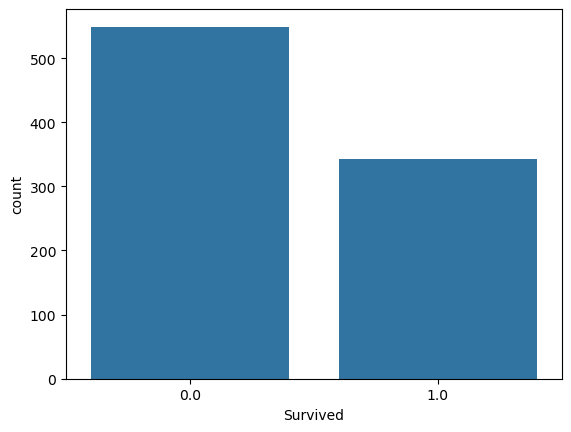

In [8]:
sns.countplot(x=df['Survived'])

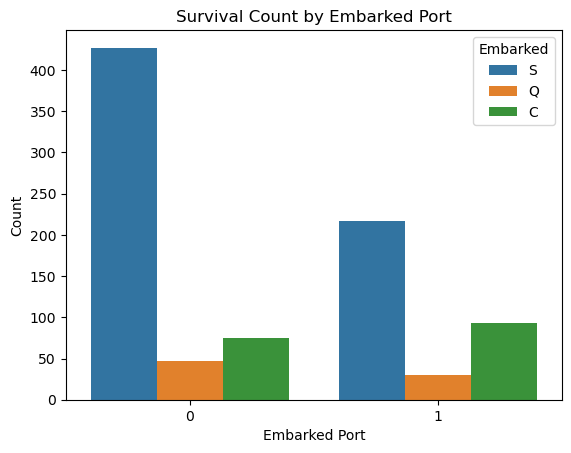

In [9]:
sns.countplot(x='Survived', hue='Embarked', data=df_train)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

# Feature Engineering

In [10]:
df.drop(columns=['Cabin','Name','Ticket'], inplace=True)

In [11]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [12]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [13]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025731,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.070323,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.366371,0.060832,0.018322,-0.558683
Age,0.025731,-0.070323,-0.366371,1.000000,-0.190747,-0.130872,0.170851
SibSp,-0.055224,-0.035322,0.060832,-0.190747,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.130872,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.170851,0.160349,0.221635,1.000000


In [14]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,source
0,1,0.0,3,male,22.000000,1,0,7.2500,S,train
1,2,1.0,1,female,38.000000,1,0,71.2833,C,train
2,3,1.0,3,female,26.000000,0,0,7.9250,S,train
3,4,1.0,1,female,35.000000,1,0,53.1000,S,train
4,5,0.0,3,male,35.000000,0,0,8.0500,S,train
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,29.881138,0,0,8.0500,S,test
1305,1306,NaN,1,female,39.000000,0,0,108.9000,C,test
1306,1307,NaN,3,male,38.500000,0,0,7.2500,S,test
1307,1308,NaN,3,male,29.881138,0,0,8.0500,S,test


In [15]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         2
source           0
dtype: int64

# Modelling

In [16]:
train  = df[df.Survived.notnull()]
test = df[df.Survived.isnull()].drop('Survived', axis=1)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
x = train.drop(['Survived'], axis=1)
y = train['Survived']

In [19]:
x=pd.get_dummies(data=x,drop_first=True)

In [20]:
model = Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x, y, epochs=250, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4817 - loss: 1.3218 - val_accuracy: 0.6425 - val_loss: 0.6917
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5929 - loss: 0.6917 - val_accuracy: 0.6425 - val_loss: 0.6896
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6261 - loss: 0.6891 - val_accuracy: 0.6425 - val_loss: 0.6874
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5951 - loss: 0.6876 - val_accuracy: 0.6425 - val_loss: 0.6855
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6026 - loss: 0.6870 - val_accuracy: 0.6480 - val_loss: 0.6813
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6058 - loss: 0.6844 - val_accuracy: 0.6480 - val_loss: 0.6799
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6192 - loss: 0.6879 - val_accuracy: 0.6480 - val_loss: 0.6786
Epoch 8/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6099 - loss: 0.6814 - val_accuracy: 0.6480 - v

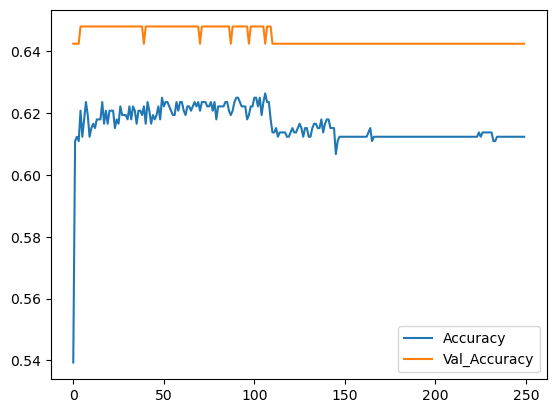

In [22]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()